##### 偵測與控制視窗
這篇教學如何在 PyQt5 偵測視窗的位置、尺寸與縮放行為，並透過對應的方法，進一步控制視窗的尺寸和位置，最後還會介紹視窗相對應的事件，當視窗事件發生時，就能進行對應的動作。

##### 偵測視窗 
在 PyQt5 裡建立最底層的視窗 Widget 元件之後，只要套用對應的偵測方法，就可以偵測視窗的屬性，下方列出常用的偵測方法：

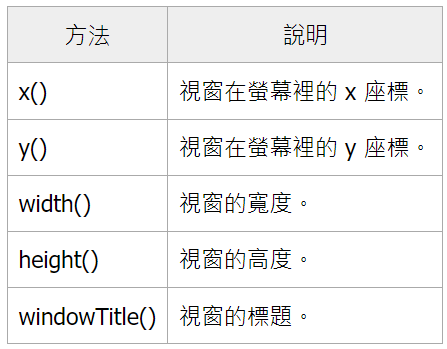

以下方的程式碼執行後，會開啟一個空白的視窗，並使用 QLabel 印出視窗的相關資訊。

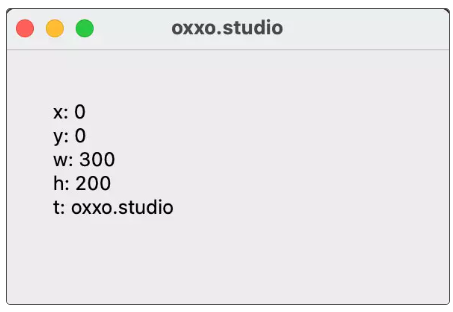

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label = QtWidgets.QLabel(Form)
label.setGeometry(10,10,200,200)

label.setText(f'''
    x: {Form.x()}
    y: {Form.y()}
    w: {Form.width()}
    h: {Form.height()}
    t: {Form.windowTitle()}
''')

Form.show()
sys.exit(app.exec_())

##### 控制視窗 
在 PyQt5 裡建立最底層的視窗 Widget 元件之後，只要套用對應的控制方法，就可以控制與設定視窗，下方列出常用的控制方法：

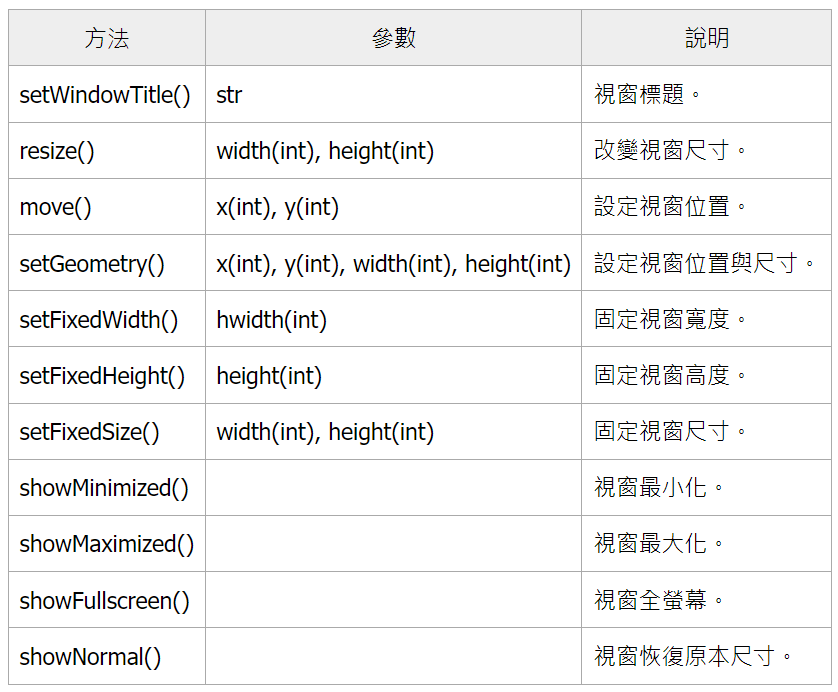

下方的例子執行後，會建立三顆按鈕，並將三顆按鈕的點擊行為綁定 lambda 匿名函式，使得點擊按鈕時會進行最大化視窗、恢復視窗以及移動視窗的效果。

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

btn1 = QtWidgets.QPushButton(Form)
btn1.setGeometry(10,10,100,30)
btn1.setText('最大化')
btn1.clicked.connect(lambda: Form.showMaximized())  # 最大化

btn2 = QtWidgets.QPushButton(Form)
btn2.setGeometry(110,10,100,30)
btn2.setText('恢復大小')
btn2.clicked.connect(lambda: Form.showNormal())     # 恢復原本大小

btn3 = QtWidgets.QPushButton(Form)
btn3.setGeometry(10,50,100,30)
btn3.setText('移動視窗')
btn3.clicked.connect(lambda: Form.move(100, 100))   # 移動到 (100, 100)

Form.show()
sys.exit(app.exec_())

##### 視窗置中、取得螢幕資訊 
在控制視窗位置與尺寸時，有時需要獲取電腦螢幕的資訊，使用 QtWidgets.QApplication.desktop() 之後，就能透過下列的方法取得電腦螢幕的尺寸。

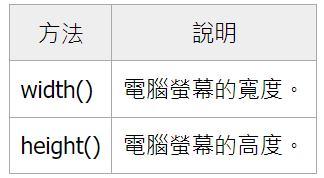

下方的程式碼執行後，會根據電腦螢幕的尺寸，以及視窗的尺寸，換算出視窗置中的座標 ( 座標必須為整數 )，進而讓視窗置中顯示。

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)
screen = QtWidgets.QApplication.desktop()
screen_w = screen.width()            # 電腦螢幕寬度
screen_h = screen.height()           # 電腦螢幕高度

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)
Form_w = Form.width()                # 視窗寬度
Form_h = Form.height()               # 視窗高度

new_x = int((screen_w - Form_w)/2)   # 計算後的 x 座標
new_y = int((screen_h - Form_h)/2)   # 計算後的 y 座標
Form.move(new_x, new_y)              # 移動視窗

Form.show()
sys.exit(app.exec_())

##### 視窗事件 
下方列出常用的視窗事件，可以在視窗顯示、關閉、移動、縮放或焦點改變時觸發。

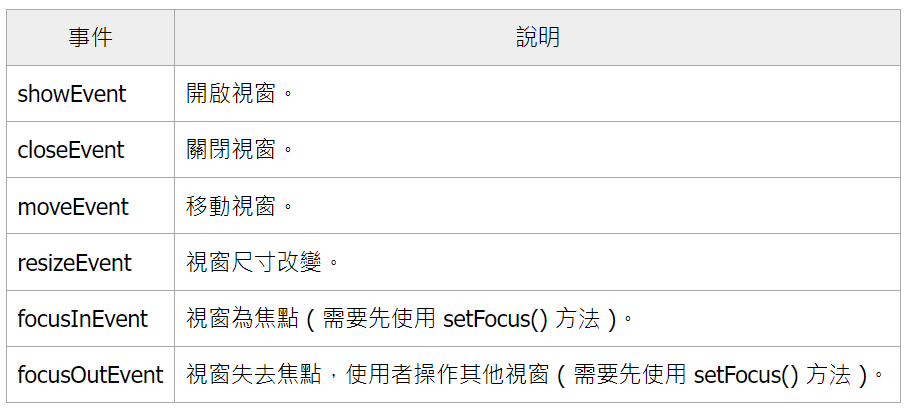

下方的程式碼執行後，用滑鼠改變視窗大小或位置，就能看見後台印出對應的事件內容。

In [ ]:
from PyQt5 import QtWidgets
import sys

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def close(self):
    print('close!!')

def move(self):
    print('move...')

def resize(self):
    print('resize')

def show(self):
    print('show')

def focusIn(self):
    print('focus in')

def focusOut(self):
    print('focus out')

Form.closeEvent = close
Form.moveEvent = move
Form.resizeEvent = resize
Form.showEvent = show
Form.setFocus()
Form.focusInEvent = focusIn
Form.focusOutEvent = focusOut

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示，注意參數需要有 event。

In [ ]:
# 导入必要的模块，QtWidgets 包含用于构建图形用户界面的类，QKeySequence 处理键盘快捷键（尽管本例未使用）。
from PyQt5 import QtWidgets
from PyQt5.QtGui import QKeySequence
import sys  # 导入 sys 模块，用于程序的退出和命令行参数处理。

# 定义 MyWidget 类，继承自 QtWidgets.QWidget，提供基本的窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用父类构造函数初始化窗口。
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题。
        self.resize(300, 200)  # 设置窗口初始大小。

        # 以下为窗口事件的自定义处理方法的绑定。
        self.closeEvent = self.f_close  # 当窗口关闭事件发生时调用。
        self.moveEvent = self.f_move  # 当窗口移动事件发生时调用。
        self.resizeEvent = self.f_resize  # 当窗口大小调整事件发生时调用。
        self.showEvent = self.f_show  # 当窗口显示事件发生时调用。
        
        self.setFocus()  # 设置窗口获取焦点。
        self.focusInEvent = self.f_focusIn  # 当窗口获取焦点事件发生时调用。
        self.focusOutEvent = self.f_focusOut  # 当窗口失去焦点事件发生时调用。

    # 定义处理关闭事件的函数。
    def f_close(self, event):
        print('close!!')  # 输出提示信息。

    # 定义处理移动事件的函数。
    def f_move(self, event):
        print('move...')  # 输出提示信息。

    # 定义处理调整大小事件的函数。
    def f_resize(self, event):
        print('resize')  # 输出提示信息。

    # 定义处理显示事件的函数。
    def f_show(self, event):
        print('show')  # 输出提示信息。

    # 定义处理获取焦点事件的函数。
    def f_focusIn(self, event):
        print('focus in')  # 输出提示信息。

    # 定义处理失去焦点事件的函数。
    def f_focusOut(self, event):
        print('focus out')  # 输出提示信息。

# 主程序入口。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建 QApplication 实例。
    Form = MyWidget()  # 创建 MyWidget 实例。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 启动事件循环，等待用户操作。